# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.
4. Пришлите на почту *ml-teachers* ссылку на этот файл в вашем репозитории.
5. В теме письма указать `ML Homework #3: Name Surname`. Если тема будет неправильная, то задание не будет проверено.

**Дедлайн: 10.11.2017 00:00 OMSK**

#### Полезная литература

- https://matplotlib.org/gallery/index.html
- http://seaborn.pydata.org/examples/index.html

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Задания разминки ( 2 балла)

1) С помощью numpy и matplotlib нарисуйте косинусоиду `np.cos`, логарифм `np.log`, произведение синусоиды на логарифм `np.sin * np.log` и прямую на одном графике (без коэффициентов). Область определения $$x \in [0,10]$$, количество точек должно быть 1000.

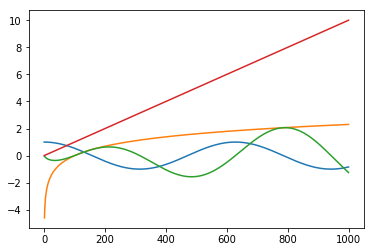

In [2]:
x = np.linspace(0,10, 1000)
with np.errstate(divide='ignore', invalid='ignore'):
    plt.plot(np.cos(x))
    plt.plot(np.log(x))
    plt.plot(np.sin(x) * np.log(x))
    plt.plot(x)

2) Нарисуйте scatter plot для двух семейств точек:
- первое семейство точек генерируйте из стандартного нормального распределения `np.random.randn` для обеих координат x и y
- второе семейтсов точек генерируйте из стандарнтого нормального распределения для координаты x и гамма распределения формы 4 `np.random.gamma` для координты y.

Должны получиться два облака точек разного цвета, которые можно мысленно разделить прямой с некоторой погрешностью.

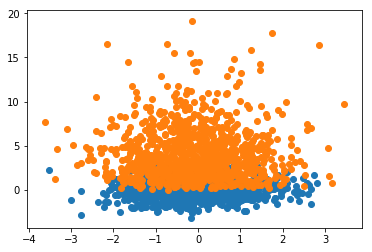

In [3]:
x = np.random.randn(1,1000)
y = np.random.randn(1,1000)
plt.scatter(x, y)

x = np.random.randn(1,1000)
shape, scale = 2., 2.
y = np.random.gamma(shape, scale, 1000)
plt.scatter(x, y)

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Данные лежат в папке `2017-fall/data` https://github.com/7bits/ml-course-7bits/tree/master/2017-fall/data

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [4]:
df = pd.read_csv('data/bikes_rent.csv.gz', compression='gzip')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
season            731 non-null int64
yr                731 non-null int64
mnth              731 non-null int64
holiday           731 non-null int64
weekday           731 non-null int64
workingday        731 non-null int64
weathersit        731 non-null int64
temp              731 non-null float64
atemp             731 non-null float64
hum               731 non-null float64
windspeed(mph)    731 non-null float64
windspeed(ms)     731 non-null float64
cnt               731 non-null int64
dtypes: float64(5), int64(8)
memory usage: 74.3 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

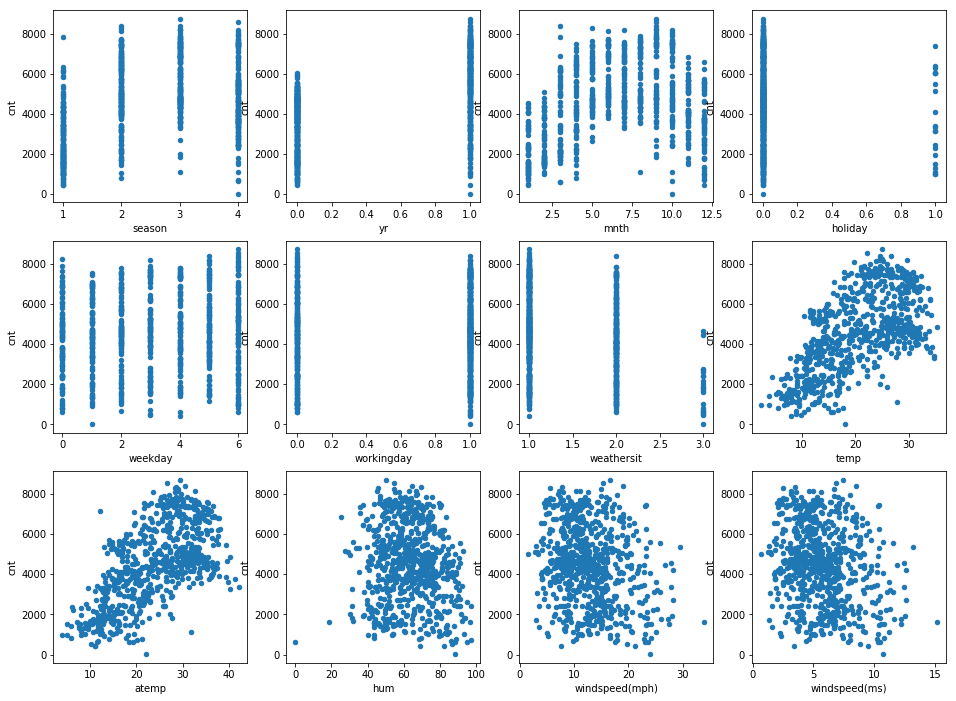

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы (каждый 1 балл):

#### Каков характер зависимости числа прокатов от месяца?

ответ: в зимний период меньше всего велосипеды берутся в прокат, в то же время в конце весны/летом/в начале осени количество прокатов почти никогда не бывает меньше 2000 штук.

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ: число прокатов линейно зависит от температуры, ощущаемой температуры и скорости ветра

## 2. Корреляционная матрица (2 балла)

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ: меньше всего количество прокатов коррелирует со следующими характеристиками: 
* праздники
* рабочий день
* выходной день
* влажность

Больше всего количество прокатов коррелирует со следующими характеристиками:
* температура и температура по ощущениям
* оценка благоприятности погоды
* год
* скорость ветра (м/с или мил/ч)

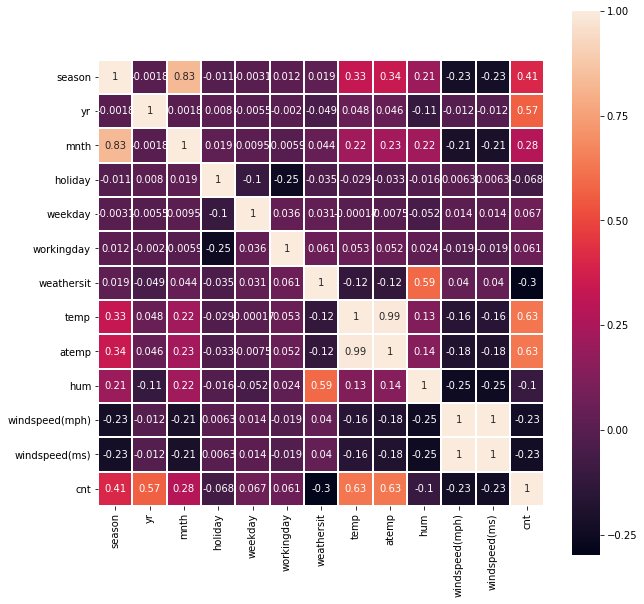

In [8]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, square=True,linewidths=1, annot=True, ax=ax)

## 3. Barpot (2 балла)

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: В 2012 году количество пользователей велопрокатом значительно увеличилось, по сравнению с 2011 годом

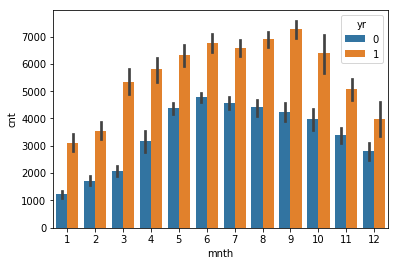

In [9]:
sns.barplot(x="mnth", y="cnt", hue="yr", data=df)

## 4. Countplot (3 балла)

Постройте countplot диаграммы для признаков `weekday`, `weathersit`, 

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: данные собирали каждый день, в течение 2011-2012 годов, чаще всего - в благоприятную погоду. 
    
Ответ: это однородное распределение

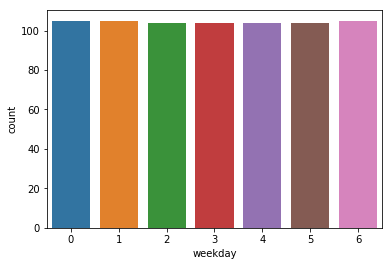

In [10]:
sns.countplot(x = "weekday", data = df)

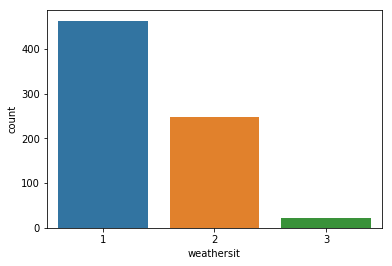

In [11]:
sns.countplot(x = "weathersit", data = df)

## 5. Распределение (3 балла)

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: в среднем бывает около 5000 прокатов в день.

Ответ: это нормальное распределение

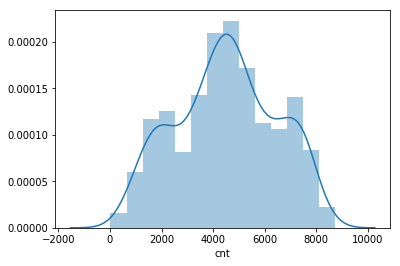

In [12]:
sns.distplot(df['cnt'])

## 6. Совместное распределение признаков (2 балла)

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: чем ниже/выше температура, тем сильней отклонения ощущаемой температуры

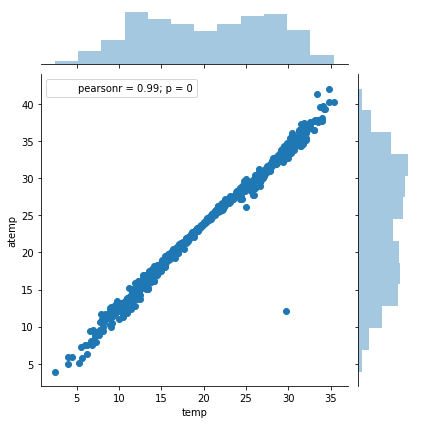

In [13]:
sns.jointplot(x='temp', y='atemp', data=df)

## 7. Ящик с усами (2 балла)

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: основная причина такой разницы - сезоны отпусков, когда людям нет нужды пользоваться собственной машиной/общественным транспортом, чтобы ехать на работу/с работы, поэтому они могут снять напрокат велосипед и доехать до необходимого им места.

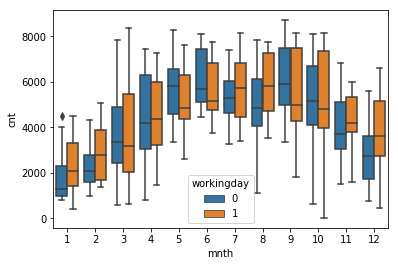

In [15]:
sns.boxplot(x='mnth', y='cnt', hue='workingday', data=df)

## 8*. Со звёздочкой (5 баллов)

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение: отчасти можно сказать, что это правда. Из построенного графика разности ощущаемой температуры и фактической температуры и скорости ветра видно, что при более сильных ветрах человеку ощущается, что на улице холодней, в то время как в реальности темпертура выше. В то же время некоторым людям казалось, что температура на улице выше действительной, хотя и был сильный ветер.

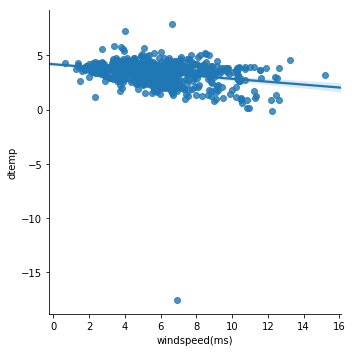

In [44]:
df['dtemp'] = df['atemp'] - df['temp']
sns.lmplot(x='windspeed(ms)', y='dtemp', data=df)